In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load Dataset

In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
print("Shape of X_train: ", x_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_test: ", y_test.shape)


Shape of X_train:  (50000, 32, 32, 3)
Shape of Y_train:  (50000, 10)
Shape of X_test:  (10000, 32, 32, 3)
Shape of Y_test:  (10000, 10)


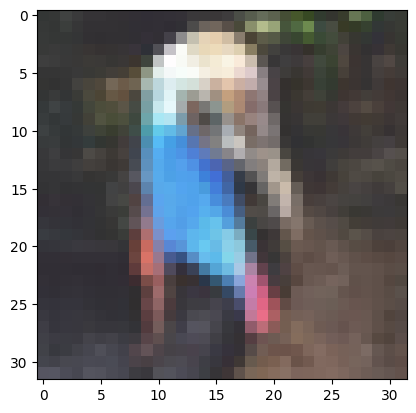

In [22]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

# Model

In [23]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3414 - loss: 1.7913
Epoch 2/5
 53/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 100ms/step - accuracy: 0.5343 - loss: 1.3097

In [14]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.6767 - loss: 0.6139


[0.7022016048431396, 0.6175000071525574]

# Making predictions

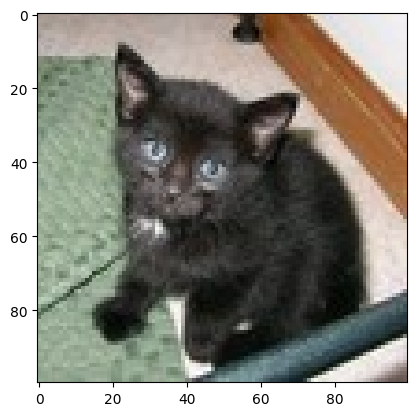

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Our model says it is a : cat


In [15]:
# CIFAR-10 class labels (assuming you're using the standard CIFAR-10 dataset)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select a random index for testing
idx2 = random.randint(0, len(y_test) - 1)

# Display the image
plt.imshow(x_test[idx2])
plt.show()

# Predict the class for the selected image
y_pred = model.predict(x_test[idx2].reshape(1, 32, 32, 3))  # Reshape for model input
predicted_class = np.argmax(y_pred, axis=1)  # Get the index of the max probability

# Get the class label
pred = class_names[predicted_class[0]]

print("Our model says it is a:", pred)